## Optimisation des hyperparamètres

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])

param_grid = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__kernel": ["linear", "rbf", "poly"],
    "svm__gamma": ["scale", "auto", 0.01, 0.1],
}

grid = GridSearchCV(
    pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True
)

grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...svm', SVC())])"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'svm__C': [0.1, 1, ...], 'svm__gamma': ['scale', 'auto', ...], 'svm__kernel': ['linear', 'rbf', ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is

In [5]:
print(f"Meilleurs parametres : {grid.best_params_}")
print(f"Meilleur score CV : {grid.best_score_}")

Meilleurs parametres : {'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Meilleur score CV : 0.9802197802197803


In [6]:
nb_combi = 1

for values in param_grid.values():
    nb_combi *= len(values)

print(f"Nombre de combinaisons : {nb_combi}")

Nombre de combinaisons : 48


In [8]:
import pandas as pd

# Analyser les résultats

results = pd.DataFrame(grid.cv_results_)

top_10 = results.nlargest(10, "mean_test_score")

print(top_10)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
31       0.003492  1.127502e-03         0.001454        0.000436   
0        0.006251  4.387810e-03         0.001971        0.000985   
3        0.003150  5.925539e-04         0.000954        0.000716   
6        0.003339  4.017870e-04         0.001341        0.000352   
9        0.002747  2.887499e-04         0.001596        0.000372   
13       0.003845  3.086359e-04         0.002210        0.000205   
16       0.003517  4.370285e-07         0.001804        0.000402   
25       0.002980  2.573734e-04         0.001901        0.000573   
28       0.004250  8.042260e-04         0.001571        0.000464   
19       0.003367  8.291341e-04         0.002025        0.000320   

    param_svm__C param_svm__gamma param_svm__kernel  \
31          10.0             0.01               rbf   
0            0.1            scale            linear   
3            0.1             auto            linear   
6            0.1             0.

In [ ]:
# Récupération de meilleure modèle
best_model = grid.best_estimator_

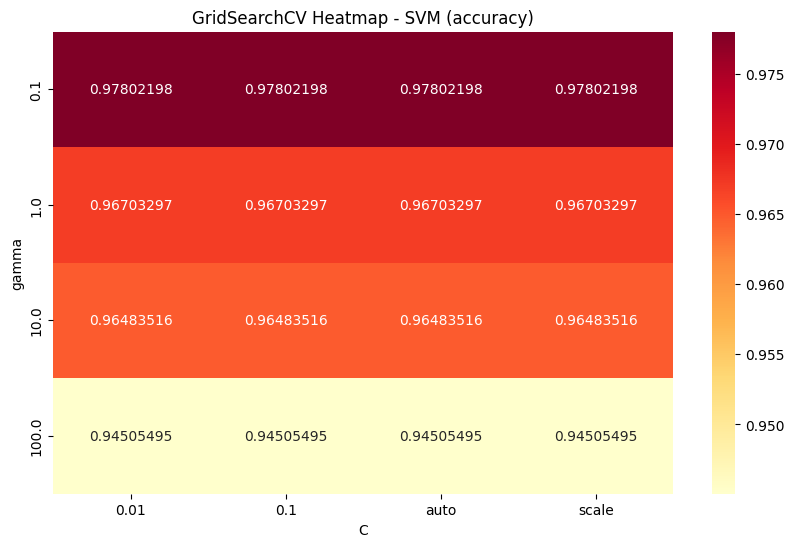

In [ ]:
import seaborn as sns

linear_results = results[results["param_svm__kernel"] == "poly"].copy()

C_values = [0.1, 1, 10, 100]
gamma_values = ["scale", "auto", 0.01, 0.1]

pivot = linear_results.pivot_table(
    values="mean_test_score",
    index="param_svm__C",
    columns="param_svm__gamma",
    aggfunc="mean",
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".8f", cmap="YlOrRd")
plt.xlabel("C")
plt.ylabel("gamma")
plt.title("GridSearchCV Heatmap - SVM (accuracy)")
plt.show()